(chisquare)=
# Categorical data analysis

Now that we've got the basic theory behind hypothesis testing, it's time to start looking at specific tests that are commonly used in psychology. So where should we start? Not every textbook agrees on where to start, but I'm going to start with "$\chi^2$ tests" (this chapter) and "$t$-tests" [next chapter](ttest). Both of these tools are very frequently used in scientific practice, and while they're not as powerful as ["analysis of variance"](ANOVA) and ["regression"](regression) they're much easier to understand.

The term "categorical data" is just another name for "nominal scale data". It's nothing that we haven't already discussed, it's just that in the context of data analysis people tend to use the term "categorical data" rather than "nominal scale data". I don't know why. In any case, **_categorical data analysis_** refers to a collection of tools that you can use when your data are nominal scale. However, there are a lot of different tools that can be used for categorical data analysis, and this chapter only covers a few of the more common ones.

(goftest)=

## The $\chi^2$ goodness-of-fit test

The $\chi^2$ goodness-of-fit test is one of the oldest hypothesis tests around: it was invented by Karl Pearson around the turn of the century {cite:p}`Pearson1900`, with some corrections made later by  Sir Ronald Fisher {cite}`Fisher1922`. To introduce the statistical problem that it addresses, let's start with some psychology... 

### The cards data

Over the years, there have been a lot of studies showing that humans have a lot of difficulties in simulating randomness. Try as we might to "act" random, we *think* in terms of patterns and structure, and so when asked to "do something at random", what people actually do is anything but random. As a consequence, the study of human randomness (or non-randomness, as the case may be) opens up a lot of deep psychological questions about how we think about the world. With this in mind, let's consider a very simple study. Suppose I asked people to imagine a shuffled deck of cards, and mentally pick one card from this imaginary deck "at random". After they've chosen one card, I ask them to mentally select a second one. For both choices, what we're going to look at is the suit (hearts, clubs, spades or diamonds) that people chose. After asking, say, $N=200$ people to do this, I'd like to look at the data and figure out whether or not the cards that people pretended to select were really random. The data are contained in the file called `cards.csv`. Let's take a look:

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/cards.csv')
df


ModuleNotFoundError: No module named 'pandas'

As you can see, the `cards` data frame contains three variables, an `id` variable that assigns a unique identifier to each participant, and the two variables `choice_1` and `choice_2` that indicate the card suits that people chose. Here's the first few entries in the data frame:

In [23]:
df.head()

,id,choice_1,choice_2
0,subj1,spades,clubs
1,subj2,diamonds,clubs
2,subj3,hearts,clubs
3,subj4,spades,clubs
4,subj5,hearts,spades


For the moment, let's just focus on the first choice that people made. We'll use the `value_counts()` function to count the number of times that we observed people choosing each suit. I'll save the table to a variable called `observed`, for reasons that will become clear very soon:

In [24]:
observed = df['choice_1'].value_counts()
observed

hearts      64
diamonds    51
spades      50
clubs       35
Name: choice_1, dtype: int64

That little frequency table is quite helpful. Looking at it, there's a bit of a hint that people *might* be more likely to select hearts than clubs, but it's not completely obvious just from looking at it whether that's really true, or if this is just due to chance. So we'll probably have to do some kind of statistical analysis to find out, which is what I'm going to talk about in the next section. 
 

Excellent. From this point on, we'll treat this table as the data that we're looking to analyse. However, since I'm going to have to talk about this data in mathematical terms (sorry!) it might be a good idea to be clear about what the notation is. In Python, if I wanted to pull out the number of people that selected diamonds, I can type `observed[1]` (diamonds is the second element in the list, but remember Python is zero-indexed, so clubs is 0, diamonds is 1, etc.). The mathematical notation for this is pretty similar, except that we shorten the human-readable word "observed" to the letter $O$, and we use subscripts rather than brackets. Also, since we are trying to make this more or less human-readable, let's start our subscripts at 1 rather than zero. So the second observation in our table is written as `observed[1]` in Python, and is written as $O_2$ in maths. The relationship between the English descriptions, the Python commands, and the mathematical symbols are illustrated below: 

|label                   | index $i$ | math. symbol |   Python command   | the value |
|:-----------------------|:---------:|:------------:|:-------------:|:---------:|
|hearts $\heartsuit$     |     0     |    $O_1$     | `observed[0]` |    64     |
|diamonds $\diamondsuit$ |     1     |    $O_2$     | `observed[1]` |    51     |
|spades $\spadesuit$     |     2     |    $O_3$     | `observed[2]` |    50     |
|clubs $\clubsuit$       |     3     |    $O_4$     | `observed[3]` |    35     |

Hopefully that's pretty clear. It's also worth nothing that mathematicians prefer to talk about things in general rather than specific things, so you'll also see the notation $O_i$, which refers to the number of observations that fall within the $i$-th category (where $i$ could be 1, 2, 3 or 4). Finally, if we want to refer to the set of all observed frequencies, statisticians group all of observed values into a vector, which I'll refer to as $O$. 

$$
O = (O_1, O_2, O_3, O_4)
$$

Again, there's nothing new or interesting here: it's just notation. If I say that $O~=~(64, 51, 50, 35)$ all I'm doing is describing the table of observed frequencies (i.e., `observed`), but I'm referring to it using mathematical notation, rather than by referring to an Python variable. 

### The null hypothesis and the alternative hypothesis

As the last section indicated, our research hypothesis is that "people don't choose cards randomly". What we're going to want to do now is translate this into some statistical hypotheses, and construct a statistical test of those hypotheses. The test that I'm going to describe to you is **_Pearson's $\chi^2$ goodness of fit test_**, and as is so often the case, we have to begin by carefully constructing our null hypothesis. In this case, it's pretty easy. First, let's state the null hypothesis in words:


$H_0$: All four suits are chosen with equal probability


Now, because this is statistics, we have to be able to say the same thing in a mathematical way. To do this, let's use the notation $P_j$ to refer to the true probability that the $j$-th suit is chosen. If the null hypothesis is true, then each of the four suits has a 25\% chance of being selected: in other words, our null hypothesis claims that $P_1 = .25$, $P_2 = .25$, $P_3 = .25$ and finally that $P_4 = .25$. However, in the same way that we can group our observed frequencies into a vector $O$ that summarises the entire data set, we can use $P$ to refer to the probabilities that correspond to our null hypothesis. So if I let the vector $P = (P_1, P_2, P_3, P_4)$ refer to the collection of probabilities that describe our null hypothesis, then we have


$H_0: {P} = (.25, .25, .25, .25)$

In this particular instance, our null hypothesis corresponds to a vector of probabilities $P$ in which all of the probabilities are equal to one another. But this doesn't have to be the case. For instance, if the experimental task was for people to imagine they were drawing from a deck that had twice as many clubs as any other suit, then the null hypothesis would correspond to something like $P = (.4, .2, .2, .2)$. As long as the probabilities are all positive numbers, and they all sum to 1, them it's a perfectly legitimate choice for the null hypothesis. However, the most common use of the goodness of fit test is to test a null hypothesis that all of the categories are equally likely, so we'll stick to that for our example. 

What about our alternative hypothesis, $H_1$? All we're really interested in is demonstrating that the probabilities involved aren't all identical (that is, people's choices weren't completely random). As a consequence, the "human friendly" versions of our hypotheses look like this:


$H_0$: All four suits are chosen with equal probability

$H_1$: At least one of the suit-choice probabilities *isn't* .25



and the "mathematician friendly" version is

$H_0$: $P = (.25, .25, .25, .25)$

$H_1$: $P \neq (.25,.25,.25,.25)$


Maybe what I should do is store the $P$ list in Python as well, since we're almost certainly going to need it later. And because I'm so imaginative, I'll call this panads series `probabilities`:

In [25]:
# make dictionary of values
dict = {'hearts' : .25,
        'diamonds' : .25,
        'spades' : .25,
        'clubs': .25}
   
# create series from dictionary
probabilities = pd.Series(dict)
probabilities

hearts      0.25
diamonds    0.25
spades      0.25
clubs       0.25
dtype: float64

### The "goodness of fit" test statistic


At this point, we have our observed frequencies $O$ and a collection of probabilities $P$ corresponding the null hypothesis that we want to test. We've stored these in R as the corresponding variables `observed` and `probabilities`. What we want to do now is construct a test of the null hypothesis. As always, if we want to test $H_0$ against $H_1$, we're going to need a test statistic. The basic trick that a goodness of fit test uses is to construct a test statistic that measures how "close" the data are to the null hypothesis. If the data don't resemble what you'd "expect" to see if the null hypothesis were true, then it probably isn't true. Okay, if the null hypothesis were true, what would we expect to see? Or, to use the correct terminology, what are the **_expected frequencies_*?. There are $N=200$ observations, and (if the null is true) the probability of any one of them choosing a heart is $P_3 = .25$, so I guess we're expecting $200 \times .25 = 50$ hearts, right? Or, more specifically, if we let $E_i$ refer  to "the number of category $i$ responses that we're expecting if the null is true", then

$$
E_i = N \times P_i
$$

This is pretty easy to calculate in Python:

In [26]:
N = 200 #sample size
expected = N * probabilities
expected

hearts      50.0
diamonds    50.0
spades      50.0
clubs       50.0
dtype: float64

None of which is very surprising: if there are 200 observation that can fall into four categories, and we think that all four categories are equally likely, then on average we'd expect to see 50 observations in each category, right?

Now, how do we translate this into a test statistic? Clearly, what we want to do is compare the *expected* number of observations in each category ($E_i$) with the *observed* number of observations in that category ($O_i$). And on the basis of this comparison, we ought to be able to come up with a good test statistic. To start with, let's calculate the difference between what the null hypothesis expected us to find and what we actually did find. That is, we calculate the "observed minus expected" difference score, $O_i - E_i$. This is illustrated in the following table. 

|                   |            | $\clubsuit$| $\diamondsuit$| $\heartsuit$| $\spadesuit$|
|:------------------|:-----------|-----------:|--------------:|------------:|------------:|
|expected frequency |$E_i$       |          50|             50|           50|           50|
|observed frequency |$O_i$       |          35|             51|           64|           50|
|difference score   |$O_i - E_i$ |         -15|              1|           14|            0|

The same calculations can be done in Python, using our `expected` and `observed` variables:

In [27]:
observed-expected

hearts      14.0
diamonds     1.0
spades       0.0
clubs      -15.0
dtype: float64

Regardless of whether we do the calculations by hand or whether we do them in Python, it's clear that people chose more hearts and fewer clubs than the null hypothesis predicted. However, a moment's thought suggests that these raw differences aren't quite what we're looking for. Intuitively, it feels like it's just as bad when the null hypothesis predicts too few observations (which is what happened with hearts) as it is when it predicts too many (which is what happened with clubs). So it's a bit weird that we have a negative number for clubs and a positive number for hearts. One easy way to fix this is to square everything, so that we now calculate the squared differences, $(E_i - O_i)^2$. As before, we could do this by hand, but it's easier to do it in Python...

In [28]:
(observed - expected)**2

hearts      196.0
diamonds      1.0
spades        0.0
clubs       225.0
dtype: float64

Now we're making progress. What we've got now is a collection of numbers that are big whenever the null hypothesis makes a bad prediction (clubs and hearts), but are small whenever it makes a good one (diamonds and spades). Next, for some technical reasons that I'll explain in a moment, let's also divide all these numbers by the expected frequency $E_i$, so we're actually calculating $\frac{(E_i-O_i)^2}{E_i}$. Since $E_i = 50$ for all categories in our example, it's not a very interesting calculation, but let's do it anyway. The Python command becomes:

In [29]:

(observed - expected)**2 / expected


hearts      3.92
diamonds    0.02
spades      0.00
clubs       4.50
dtype: float64

In effect, what we've got here are four different "error" scores, each one telling us how big a "mistake" the null hypothesis made when we tried to use it to predict our observed frequencies. So, in order to convert this into a useful test statistic, one thing we could do is just add these numbers up. The result is called the **_goodness of fit_** statistic, conventionally referred to either as $X^2$ or GOF. We can calculate it using this command in Python:

In [30]:
sum((observed - expected)**2/expected)

8.44

The formula for this statistic looks remarkably similar to the Python command. If we let $k$ refer to the total number of categories (i.e., $k=4$ for our cards data), then the $X^2$ statistic is given by:

$$
X^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i}
$$ 

Intuitively, it's clear that if $X^2$ is small, then the observed data $O_i$ are very close to what the null hypothesis predicted $E_i$, so we're going to need a large $X^2$ statistic in order to reject the null. As we've seen from our calculations, in our cards data set we've got a value of $X^2 = 8.44$. So now the question becomes, is this a big enough value to reject the null?

### The sampling distribution of the GOF statistic (advanced)

To determine whether or not a particular value of $X^2$ is large enough to justify rejecting the null hypothesis, we're going to need to figure out what the sampling distribution for $X^2$ would be if the null hypothesis were true. So that's what I'm going to do in this section. I'll show you in a fair amount of detail how this sampling distribution is constructed, and then -- in the next section -- use it to build up a hypothesis test. If you want to cut to the chase and are willing to take it on faith that the sampling distribution is a **_chi-squared ($\chi^2$) distribution_** with $k-1$ degrees of freedom, you can skip the rest of this section. However, if you want to understand *why* the goodness of fit test works the way it does, read on...

Okay, let's suppose that the null hypothesis is actually true. If so, then the true probability that an observation falls in the $i$-th category is $P_i$ -- after all, that's pretty much the definition of our null hypothesis. Let's think about what this actually means. If you think about it, this is kind of like saying that "nature" makes the decision about whether or not the observation ends up in category $i$ by flipping a weighted coin (i.e., one where the probability of getting a head is $P_j$). And therefore, we can think of our observed frequency $O_i$ by imagining that nature flipped $N$ of these coins (one for each observation in the data set)... and exactly $O_i$ of them came up heads. Obviously, this is a pretty weird way to think about the experiment. But what it does (I hope) is remind you that we've actually seen this scenario before. It's exactly the same set up that gave rise to the [binomial distribution](binomial). In other words, if the null hypothesis is true, then it follows that our observed frequencies were generated by sampling from a binomial distribution:

$$
O_i \sim \mbox{Binomial}(P_i, N)
$$

Now, if you remember from our discussion of the [central limit theorem](clt), the binomial distribution starts to look pretty much identical to the normal distribution, especially when $N$ is large and when $P_i$ isn't *too* close to 0 or 1. In other words as long as $N \times P_i$ is large enough -- or, to put it another way, when the expected frequency $E_i$ is large enough -- the theoretical distribution of $O_i$ is approximately normal. Better yet, if $O_i$ is normally distributed, then so is $(O_i - E_i)/\sqrt{E_i}$ ... since $E_i$ is a fixed value, subtracting off $E_i$ and dividing by $\sqrt{E_i}$ changes the mean and standard deviation of the normal distribution; but that's all it does. Okay, so now let's have a look at what our goodness of fit statistic actually *is*. What we're doing is taking a bunch of things that are normally-distributed, squaring them, and adding them up. Wait. We've seen that before too! As we discussed in the section on the [central limit theorem](clt), when you take a bunch of things that have a standard normal distribution (i.e., mean 0 and standard deviation 1), square them, then add them up, then the resulting quantity has a chi-square distribution. So now we know that the null hypothesis predicts that the sampling distribution of the goodness of fit statistic is a chi-square distribution. Cool. 

There's one last detail to talk about, namely the degrees of freedom. If you remember back to the section on [other useful distributions](otherdists), I said that if the number of things you're adding up is $k$, then the degrees of freedom for the resulting chi-square distribution is $k$. Yet, what I said at the start of this section is that the actual degrees of freedom for the chi-square goodness of fit test is $k-1$. What's up with that? The answer here is that what we're supposed to be looking at is the number of genuinely *independent* things that are getting added together. And, as I'll go on to talk about in the next section, even though there's $k$ things that we're adding, only $k-1$ of them are truly independent; and so the degrees of freedom is actually only $k-1$. That's the topic of the next section.[^note1]

[^note1]: I should point out that this issue does complicate the story somewhat: I'm not going to cover it in this book, but there's a sneaky trick that you can do to rewrite the equation for the goodness of fit statistic as a sum over $k-1$ independent things. When we do so we get the "proper" sampling distribution, which is chi-square with $k-1$ degrees of freedom. In fact, in order to get the maths to work out properly, you actually have to rewrite things that way. But it's beyond the scope of an introductory book to show the maths in that much detail: all I wanted to do is give you a sense of why the goodness of fit statistic is associated with the chi-squared distribution.



When I introduced the chi-square distribution in [other useful distributions](otherdists), I was a bit vague about what "**_degrees of freedom_**" actually *means*. Obviously, it matters: looking {numref}`fig-manychi` you can see that if we change the degrees of freedom, then the chi-square distribution changes shape quite substantially. But what exactly *is* it? Again, when I introduced the distribution and explained its relationship to the normal distribution, I did offer an answer... it's the number of "normally distributed variables" that I'm squaring and adding together. But, for most people, that's kind of abstract, and not entirely helpful. What we really need to do is try to understand degrees of freedom in terms of our data. So here goes.

In [31]:

from myst_nb import glue
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2




x = np.linspace(0, 10, 100)

y3 = chi2.pdf(x, df=3)
y4 = chi2.pdf(x, df=4)
y5 = chi2.pdf(x, df=5)
labels = ['df = 3']*len(x) + ['df = 4']*len(x) + ['df = 5']*len(x)
y = list(y3)+list(y4)+list(y5)
x = list(x)*3

df = pd.DataFrame(
    {'y': y,
     'x': x,
     'df': labels
    }) 

fig = sns.lineplot(x= "x", y= "y",
             style="df",
             data=df)

sns.despine()
glue("manychi_fig", fig, display=False)

ModuleNotFoundError: No module named 'myst_nb'

 ```{glue:figure} manychi_fig
:figwidth: 600px
:name: fig-manychi

Chi-square distributions with different values for the \"degrees of freedom\".
```

The basic idea behind degrees of freedom is quite simple: you calculate it by counting up the number of distinct "quantities" that are used to describe your data; and then subtracting off all of the "constraints" that those data must satisfy.[^note2] This is a bit vague, so let's use our cards data as a concrete example. We describe out data using four numbers, $O_1$, $O_2$, $O_3$ and $O_4$ corresponding to the observed frequencies of the four different categories (hearts, clubs, diamonds, spades). These four numbers are the *random outcomes* of our experiment. But, my experiment actually has a fixed constraint built into it: the sample size $N$.[^note3] That is, if we know how many people chose hearts, how many chose diamonds and how many chose clubs; then we'd be able to figure out exactly how many chose spades. In other words, although our data are described using four numbers, they only actually correspond to $4-1 = 3$ degrees of freedom. A slightly different way of thinking about it is to notice that there are four *probabilities* that we're interested in (again, corresponding to the four different categories), but these probabilities must sum to one, which imposes a constraint. Therefore, the degrees of freedom is $4-1 = 3$. Regardless of whether you want to think about it in terms of the observed frequencies or in terms of the probabilities, the answer is the same. In general, when running the chi-square goodness of fit test for an experiment involving $k$ groups, then the degrees of freedom will be $k-1$.

[^note2]:  I feel obliged to point out that this is an over-simplification. It works nicely for quite a few situations; but every now and then we'll come across degrees of freedom values that aren't whole numbers. Don't let this worry you too much -- when you come across this, just remind yourself that "degrees of freedom" is actually a bit of a messy concept, and that the nice simple story that I'm telling you here isn't the whole story. For an introductory class, it's usually best to stick to the simple story: but I figure it's best to warn you to expect this simple story to fall apart. If I didn't give you this warning, you might start getting confused when you see $df = 3.4$ or something; and (incorrectly) thinking that you had misunderstood something that I've taught you, rather than (correctly) realising that there's something that I haven't told you.

[^note3]: [In practice, the sample size isn't always fixed... e.g., we might run the experiment over a fixed period of time, and the number of people participating depends on how many people show up. That doesn't matter for the current purposes.]

### Testing the null hypothesis 

The final step in the process of constructing our hypothesis test is to figure out what the rejection region is. That is, what values of $X^2$ would lead is to reject the null hypothesis. As we saw earlier, large values of $X^2$ imply that the null hypothesis has done a poor job of predicting the data from our experiment, whereas small values of $X^2$ imply that it's actually done pretty well. Therefore, a pretty sensible strategy would be to say there is some critical value, such that if $X^2$ is bigger than the critical value we reject the null; but if $X^2$ is smaller than this value we retain the null. In other words, to use the language we introduced in the chapter on [hypothesis testing](hypothesis-testing), the chi-squared goodness of fit test is always a **_one-sided test_**. Right, so all we have to do is figure out what this critical value is. And it's pretty straightforward. If we want our test to have significance level of $\alpha = .05$ (that is, we are willing to tolerate a Type I error rate of 5\%), then we have to choose our critical value so that there is only a 5\% chance that $X^2$ could get to be that big if the null hypothesis is true. That is to say, we want the 95th percentile of the sampling distribution. This is illustrated in {numref}`fig-goftest`.

NameError: name 'glue' is not defined

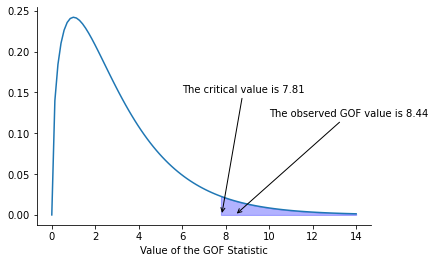

In [32]:


import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2


x = np.linspace(0, 14, 100)

y = chi2.pdf(x, df=3)

df = pd.DataFrame(
    {'y': y,
     'x': x
    }) 

fig = sns.lineplot(x= "x", y= "y",
             data=df)
critical_value = chi2.ppf(0.95, 3)
fig.fill_between(x, 0, y, where = x > critical_value-0.1, color = 'blue', alpha = 0.3)

fig.annotate("The observed GOF value is 8.44", xy=(8.44, 0), xytext=(10, 0.12), arrowprops={"arrowstyle":"->", "color":"black"})
fig.annotate("The critical value is 7.81", xy=(critical_value, 0), xytext=(6, 0.15), arrowprops={"arrowstyle":"->", "color":"black"})
fig.set(xlabel = 'Value of the GOF Statistic', ylabel='')

sns.despine()

glue("goftest-fig", fig, display=False)

```{glue:figure} goftest-fig
:figwidth: 600px
:name: fig-goftest

Illustration of how the hypothesis testing works for the chi-square goodness of fit test.

```

Ah, but -- I hear you ask -- how do I calculate the 95th percentile of a chi-squared distribution with $k-1$ degrees of freedom? If only Python had some function, called... oh, I don't know, chi2 percent, or chi2 percent point ... that would let you calculate this percentile. What about the "chi2 percent point function", `chi2.ppf()`, hmm?  Doesn't that sound like it might do the trick? Like this...

In [33]:
from scipy.stats import chi2
round(chi2.ppf(0.95, 3),2)

7.81

So if our $X^2$ statistic is bigger than 7.81 or so, then we can reject the null hypothesis. Since we actually calculated that before (i.e., $X^2 = 8.44$), we know that we can reject the null. If we want an exact $p$-value, we can calculate it using the `chisquare()` function from `scipy.stats`:

In [34]:
from scipy.stats import chisquare

chisquare(f_obs = observed, f_exp = expected)

Power_divergenceResult(statistic=8.44, pvalue=0.0377418520240214)

So, in this case we would reject the null hypothesis, since $p < .05$.  And that's it, basically. You now know "Pearson's $\chi^2$ test for the goodness of fit". Lucky you.

(gofTestInPython)=
### Doing the test in Python

Gosh darn it. Although we did manage to do everything in Python as we were going through that little example, it does rather feel as if we're typing too many things into the magic computing box. And I *hate* typing. Unfortunately, to my knowledge, there is no ready-made function in Python to go directly from the raw data to a finished chi2 goodness-of-fit analysis, but we can get pretty close with `chisquare` from `scipy.stats`. If we don't supply any expected values, then the function assumes that we expect equal counts for all items, so all we need to do is feed the frequency table directly into the `chisquare` function, like so:

In [59]:
import pandas as pd
from scipy.stats import chisquare

df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/cards.csv')

ans = chisquare(f_obs = df['choice_1'].value_counts())

print("x2 = ", ans[0])
print("p = ", round(ans[1],3))

x2 =  8.44
p =  0.038


### Specifying a different null hypothesis

At this point you might be wondering what to do if you want to run a goodness of fit test, but your null hypothesis is *not* that all categories are equally likely. For instance, let's suppose that someone had made the theoretical prediction that people should choose red cards 60\% of the time, and black cards 40\% of the time (I've no idea why you'd predict that), but had no other preferences. If that were the case, the null hypothesis would be to expect 30\% of the choices to be hearts, 30\% to be diamonds, 20\% to be spades and 20\% to be clubs. This seems like a silly theory to me, and it's pretty easy to test it using our data. All we need to do is specify the probabilities associated with the null hypothesis. We create a vector like this:

In [60]:


# make dictionary of values
dict = {'hearts' : .3,
        'diamonds' : .3,
        'spades' : .2,
        'clubs': .2}
   
# create series from dictionary
nullProbs = pd.Series(dict)
nullProbs


hearts      0.3
diamonds    0.3
spades      0.2
clubs       0.2
dtype: float64

Now we have explicitly specified our null hypothesis in terms of probabilities. There is one more step, though, because `chisquare` expects the counts in the observed and "expected" data to add up to the same thing; otherwise there is no way for it to compare them. So, to convert our null hypothesis probabilities to count values, we need to multiply them by the total number of items counted in our observed data (which in the case of the `cards` data was 200, remember?) Once that is taken care of, we can go ahead and run the test:

In [61]:
import pandas as pd
from scipy.stats import chisquare

df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/cards.csv')

# make a frequency table for the observed data
observed = df['choice_1'].value_counts()

# make a frequency table for our expected data, using the probabilities we specified above
expected = nullProbs * sum(observed)

# run the test
ans = chisquare(f_obs = observed, f_exp = expected)

# make the output easier to read
print("x2 = ", ans[0])
print("p = ", round(ans[1],3))

x2 =  4.741666666666667
p =  0.192


The null hypothesis and the expected frequencies are different to what they were last time. As a consequence our $X^2$ test statistic is different, and our $p$-value is different too. Annoyingly, the $p$-value is .192, so we can't reject the null hypothesis. Sadly, despite the fact that the null hypothesis corresponds to a very silly theory, these data don't provide enough evidence against it.

(chisqreport})=
### How to report the results of the test

So now you know how the test works, and you know how to do the test using a wonderful magic computing box. The next thing you need to know is how to write up the results. After all, there's no point in designing and running an experiment and then analysing the data if you don't tell anyone about it! So let's now talk about what you need to do when reporting your analysis. Let's stick with our card-suits example. If I wanted to write this result up for a paper or something, the conventional way to report this would be to write something like this:

> Of the 200 participants in the experiment, 64 selected hearts for their first choice, 51 selected diamonds, 50 selected spades, and 35 selected clubs. A chi-square goodness of fit test was conducted to test whether the choice probabilities were identical for all four suits. The results were significant ($\chi^2(3) = 8.44, p<.05$), suggesting that people did not select suits purely at random.

This is pretty straightforward, and hopefully it seems pretty unremarkable. That said, there's a few things that you should note about this description:

- *The statistical test is preceded by the descriptive statistics*. That is, I told the reader something about what the data look like before going on to do the test. In general, this is good practice: always remember that your reader doesn't know your data anywhere near as well as you do. So unless you describe it to them properly, the statistical tests won't make any sense to them, and they'll get frustrated and cry.
- *The description tells you what the null hypothesis being tested is*. To be honest, writers don't always do this, but it's often a good idea in those situations where some ambiguity exists; or when you can't rely on your readership being intimately familiar with the statistical tools that you're using. Quite often the reader might not know (or remember) all the details of the test that your using, so it's a kind of politeness to "remind" them! As far as the goodness of fit test goes, you can usually rely on a scientific audience knowing how it works (since it's covered in most intro stats classes). However, it's still a good idea to be explicit about stating the null hypothesis (briefly!) because the null hypothesis can be different depending on what you're using the test for. For instance, in the cards example my null hypothesis was that all the four suit probabilities were identical (i.e., $P_1 = P_2 = P_3 = P_4 = 0.25$), but there's nothing special about that hypothesis. I could just as easily have tested the null hypothesis that $P_1 = 0.7$ and $P_2 = P_3 = P_4 = 0.1$ using a goodness of fit test. So it's helpful to the reader if you explain to them what your null hypothesis was. Also, notice that I described the null hypothesis in words, not in maths. That's perfectly acceptable. You can describe it in maths if you like, but since most readers find words easier to read than symbols, most writers tend to describe the null using words if they can.
- *A "stat block" is included*. When reporting the results of the test itself, I didn't just say that the result was significant, I included a "stat block" (i.e., the dense mathematical-looking part in the parentheses), which reports all the "raw" statistical data. For the chi-square goodness of fit test, the information that gets reported is the test statistic (that the goodness of fit statistic was 8.44), the information about the distribution used in the test ($\chi^2$ with 3 degrees of freedom, which is usually shortened to $\chi^2(3)$), and then the information about whether the result was significant (in this case $p<.05$). The particular information that needs to go into the stat block is different for every test, and so each time I introduce a new test I'll show you what the stat block should look like.[^note4] However the general principle is that you should always provide enough information so that the reader could check the test results themselves if they really wanted to. 
- *The results are interpreted*. In addition to indicating that the result was significant, I provided an interpretation of the result (i.e., that people didn't choose randomly). This is also a kindness to the reader, because it tells them something about what they should believe about what's going on in your data. If you don't include something like this, it's really hard for your reader to understand what's going on.[^note5]

As with everything else, your overriding concern should be that you *explain* things to your reader. Always remember that the point of reporting your results is to communicate to another human being. I cannot tell you just how many times I've seen the results section of a report or a thesis or even a scientific article that is just gibberish, because the writer has focused solely on making sure they've included all the numbers, and forgotten to actually communicate with the human reader. 

[^note4]: Well, sort of. The conventions for how statistics should be reported tend to differ somewhat from discipline to discipline; I've tended to stick with how things are done in psychology, since that's what I do. But the general principle of providing enough information to the reader to allow them to check your results is pretty universal, I think.

[^note5]: To some people, this advice might sound odd, or at least in conflict with the "usual" advice on how to write a technical report. Very typically, students are told that the "results" section of a report is for describing the data and reporting statistical analysis; and the "discussion" section is for providing interpretation. That's true as far as it goes, but I think people often interpret it way too literally. The way I usually approach it is to provide a quick and simple interpretation of the data in the results section, so that my reader understands what the data are telling us. Then, in the discussion, I try to tell a bigger story; about how my results fit with the rest of the scientific literature. In short; don't let the "interpretation goes in the discussion" advice turn your results section into incomprehensible garbage. Being understood by your reader is *much* more important.

### A comment on statistical notation (advanced)

>*Satan delights equally in statistics and in quoting scripture*
>
>  -- H.G. Wells


If you've been reading very closely, and are as much of a mathematical pedant as I am, there is one thing about the way I wrote up the chi-square test in the last section that might be bugging you a little bit. There's something that feels a bit wrong with writing "$\chi^2(3) = 8.44$", you might be thinking. After all, it's the goodness of fit statistic that is equal to 8.44, so shouldn't I have written $X^2 = 8.44$ or maybe GOF$=8.44$? This seems to be conflating the *sampling distribution* (i.e., $\chi^2$ with $df = 3$) with the *test statistic* (i.e., $X^2$). Odds are you figured it was a typo, since $\chi$ and $X$ look pretty similar. Oddly, it's not. Writing $\chi^2(3) = 8.44$ is essentially a highly condensed way of writing "the sampling distribution of the test statistic is $\chi^2(3)$, and the value of the test statistic is 8.44". 

In one sense, this is kind of stupid. There are *lots* of different test statistics out there that turn out to have a chi-square sampling distribution: the $X^2$ statistic that we've used for our goodness of fit test is only one of many (albeit one of the most commonly encountered ones). In a sensible, perfectly organised world, we'd *always* have a separate name for the test statistic and the sampling distribution: that way, the stat block itself would tell you exactly what it was that the researcher had calculated. Sometimes this happens. For instance, the test statistic used in the Pearson goodness of fit test is written $X^2$; but there's a closely related test known as the $G$-test[^note6] {cite}`Sokal1994`, in which the test statistic is written as $G$. As it happens, the Pearson goodness of fit test and the $G$-test both test the same null hypothesis; and the sampling distribution is exactly the same (i.e., chi-square with $k-1$ degrees of freedom). If I'd done a $G$-test for the cards data rather than a goodness of fit test, then I'd have ended up with a test statistic of $G = 8.65$, which is slightly different from the $X^2 = 8.44$ value that I got earlier; and produces a slightly smaller $p$-value of $p = .034$. Suppose that the convention was to report the test statistic, then the sampling distribution, and then the $p$-value. If that were true, then these two situations would produce different stat blocks: my original result would be written $X^2 = 8.44, \chi^2(3), p = .038$, whereas the new version using the $G$-test would be written as $G = 8.65, \chi^2(3), p = .034$. However, using the condensed reporting standard, the original result is written $\chi^2(3) = 8.44, p = .038$, and the new one is written $\chi^2(3) = 8.65, p = .034$, and so it's actually unclear which test I actually ran.  


So why don't we live in a world in which the contents of the stat block uniquely specifies what tests were ran? The deep reason is that life is messy. We (as users of statistical tools) want it to be nice and neat and organised... we want it to be *designed*, as if it were a product. But that's not how life works: statistics is an intellectual discipline just as much as any other one, and as such it's a massively distributed, partly-collaborative and partly-competitive project that no-one really understands completely. The things that you and I use as data analysis tools weren't created by an Act of the Gods of Statistics; they were invented by lots of different people, published as papers in academic journals, implemented, corrected and modified by lots of other people, and then explained to students in textbooks by someone else. As a consequence, there's a *lot* of test statistics that don't even have names; and as a consequence they're just given the same name as the corresponding sampling distribution. As we'll see later, any test statistic that follows a $\chi^2$ distribution is commonly called a "chi-square statistic"; anything that follows a $t$-distribution is called a "$t$-statistic" and so on. But, as the $X^2$ versus $G$ example illustrates, two different things with the same sampling distribution are still, well, different. 

As a consequence, it's sometimes a good idea to be clear about what the actual test was that you ran, especially if you're doing something unusual. If you just say "chi-square test", it's not actually clear what test you're talking about. Although, since the two most common chi-square tests are the goodness of fit test and the [independence test](chisqindependence)), most readers with stats training can probably guess. Nevertheless, it's something to be aware of.

[^note6]: [Complicating matters, the $G$-test is a special case of a whole class of tests that are known as *likelihood ratio tests*. I don't cover LRTs in this book, but they are quite handy things to know about.] 

(chisqindependence)=
## The $\chi^2$ test of independence (or association)


```{r echo=FALSE}
knitr::kable(data.frame(stringsAsFactors=FALSE,
     Speaker = c("GUARDBOT1:", "GUARDBOT2:", "LEELA:", "FRY:", "GUARDBOT1:",
                 "GUARDBOT2:", "GUARDBOT1:"),
      Dialog = c("Halt!", "Be you robot or human?", "Robot...we be.", "Uh, yup! Just two robots out roboting it up!  Eh?",
                 "Administer the test.",
                 "Which of the following would you most prefer?  A: A puppy, B: A pretty flower from your sweetie, or C: A large properly-formatted data file?", "Choose!")
), col.names = c("",""))

```
-- Futurama, "Fear of a Bot Planet

The other day I was watching an animated documentary examining the quaint customs of the natives of the planet *Chapek 9*. Apparently, in order to gain access to their capital city, a visitor must prove that they're a robot, not a human. In order to determine whether or not visitor is human, they ask whether the visitor prefers puppies, flowers or large, properly formatted data files. "Pretty clever," I thought to myself "but what if humans and robots have the same preferences? That probably wouldn't be a very good test then, would it?" As it happens, I got my hands on the testing data that the civil authorities of *Chapek 9* used to check this. It turns out that what they did was very simple... they found a bunch of robots and a bunch of humans and asked them what they preferred. I saved their data in a file called `chapek9.Rdata`, which I can now load and have a quick look at:

```{r}
load( file.path(projecthome, "data/chapek9.Rdata" ))
str(chapek9)
```
Okay, so we have a single data frame called `chapek9`, which contains two factors, `species` and `choice`. As always, it's nice to have a quick look at the data,

```{r}    
head(chapek9)
```
and then take a `summary()`,
```{r}
summary(chapek9)
```

In total there are 180 entries in the data frame, one for each person (counting both robots and humans as "people") who was asked to make a choice. Specifically, there's 93 humans and 87 robots; and overwhelmingly the preferred choice is the data file. However, these summaries don't address the question we're interested in. To do that, we need a more detailed description of the data. What we want to do is look at the `choices` broken down *by* `species`. That is, we need to cross-tabulate the data (see Section \@ref(freqtables)). There's quite a few ways to do this, as we've seen, but since our data are stored in a data frame, it's convenient to use the `xtabs()` function. 
```{r}
chapekFrequencies <- xtabs( ~ choice + species, data = chapek9)
chapekFrequencies
```
That's more or less what we're after. So, if we add the row and column totals (which is convenient for the purposes of explaining the statistical tests), we would have a table like this,
```{r echo=FALSE}
knitr::kable(data.frame(stringsAsFactors=FALSE,
NANA = c("Puppy", "Flower", "Data file", "Total"),
Robot = c(13, 30, 44, 87),
Human = c(15, 13, 65, 93),
Total = c(28, 43, 109, 180)
), col.names = c("", "Robot", "Human", "Total"), align = 'lccc')
```
which actually would be a nice way to report the descriptive statistics for this data set. In any case, it's quite clear that the vast majority of the humans chose the data file, whereas the robots tended to be a lot  more even in their preferences. Leaving aside the question of *why* the humans might be more likely to choose the data file for the moment (which does seem quite odd, admittedly), our first order of business is to determine if the discrepancy between human choices and robot choices in the data set is statistically significant.

### Constructing our hypothesis test

How do we analyse this data? Specifically, since my *research* hypothesis is that "humans and robots answer the question in different ways", how can I construct a test of the *null* hypothesis that "humans and robots answer the question the same way"? As before, we begin by establishing some notation to describe the data:

```{r echo=FALSE}
knitr::kable(data.frame(stringsAsFactors=FALSE,
NANA = c("Puppy", "Flower", "Data file", "Total"),
Robot = c("$O_{11}$", "$O_{21}$", "$O_{31}$", "$C_{1}$"),
Human = c("$O_{12}$", "$O_{22}$", "$O_{32}$", "$C_{2}$"),
Total = c("$R_{1}$", "$R_{2}$", "$R_{3}$", "$N$")
), col.names = c("", "Robot", "Human", "Total"))

```

In this notation we say that $O_{ij}$ is a count (observed frequency) of the number of respondents that are of species $j$ (robots or human) who gave answer $i$ (puppy, flower or data) when asked to make a choice. The total number of observations is written $N$, as usual. Finally, I've used $R_i$ to denote the row totals (e.g., $R_1$ is the total number of people who chose the flower), and $C_j$ to denote the column totals (e.g., $C_1$ is the total number of robots).^[A technical note. The way I've described the test pretends that the column totals are fixed (i.e., the researcher intended to survey 87 robots and 93 humans) and the row totals are random (i.e., it just turned out that 28 people chose the puppy). To use the terminology from my mathematical statistics textbook [@Hogg2005] I should technically refer to this situation as a chi-square test of homogeneity; and reserve the term chi-square test of independence for the situation where both the row and column totals are random outcomes of the experiment. In the initial drafts of this book that's exactly what I did. However, it turns out that these two tests are identical; and so I've collapsed them together.]

So now let's think about what the null hypothesis says. If robots and humans are responding in the same way to the question, it means that the probability that "a robot says puppy" is the same as the probability that "a human says puppy", and so on for the other two possibilities. So, if we use $P_{ij}$ to denote "the probability that a member of species $j$ gives response $i$" then our null hypothesis is that:

```{r echo=FALSE}
knitr::kable(tibble::tribble(
                         ~V1,                                                      ~V2,    
  "$H_0$:",                       " All of the following are true: ",     
                      "    ",  " $P_{11} = P_{12}$ (same probability of saying puppy)",   
                        "\t", " $P_{21} = P_{22}$ (same probability of saying flower) and", 
                        "\t",  " $P_{31} = P_{32}$ (same probability of saying data)."), col.names = c("", ""))
```

And actually, since the null hypothesis is claiming that the true choice probabilities don't depend on the species of the person making the choice, we can let $P_i$ refer to this probability: e.g., $P_1$ is the true probability of choosing the puppy.

Next, in much the same way that we did with the goodness of fit test, what we need to do is calculate the expected frequencies. That is, for each of the observed counts $O_{ij}$, we need to figure out what the null hypothesis would tell us to expect. Let's denote this expected frequency by $E_{ij}$. This time, it's a little bit trickier. If there are a total of $C_j$ people that belong to species $j$, and the true probability of anyone (regardless of species) choosing option $i$ is $P_i$, then the expected frequency is just: 
$$
E_{ij} = C_j \times P_i
$$
Now, this is all very well and good, but we have a problem. Unlike the situation we had with the goodness of fit test, the null hypothesis doesn't actually specify a particular value for $P_i$. It's something we have to estimate (Chapter \@ref(estimation)) from the data! Fortunately, this is pretty easy to do. If 28 out of 180 people selected the flowers, then a natural estimate for the probability of choosing flowers is $28/180$, which is approximately $.16$. If we phrase this in mathematical terms, what we're saying is that our estimate for the probability of choosing option $i$ is just the row total divided by the total sample size:
$$
\hat{P}_i = \frac{R_i}{N}
$$ 
Therefore, our expected frequency can be written as the product (i.e. multiplication) of the row total and the column total, divided by the total number of observations:^[Technically, $E_{ij}$ here is an estimate, so I should probably write it $\hat{E}_{ij}$. But since no-one else does, I won't either.]
$$
E_{ij} = \frac{R_i \times C_j}{N}
$$
Now that we've figured out how to calculate the expected frequencies, it's straightforward to define a test statistic; following the exact same strategy that we used in the goodness of fit test. In fact, it's pretty much the *same* statistic. For a contingency table with $r$ rows and $c$ columns, the equation that defines our $X^2$ statistic is 
$$ 
X^2 = \sum_{i=1}^r  \sum_{j=1}^c \frac{({E}_{ij} - O_{ij})^2}{{E}_{ij}}
$$
The only difference is that I have to include two summation sign (i.e., $\sum$) to indicate that we're summing over both rows and columns. As before, large values of $X^2$ indicate that the null hypothesis provides a poor description of the data, whereas small values of $X^2$ suggest that it does a good job of accounting for the data. Therefore, just like last time, we want to reject the null hypothesis if $X^2$ is too large.

Not surprisingly, this statistic is $\chi^2$ distributed. All we need to do is figure out how many degrees of freedom are involved, which actually isn't too hard. As I mentioned before, you can (usually) think of the degrees of freedom as being equal to the number of data points that you're analysing, minus the number of constraints. A contingency table with $r$ rows and $c$ columns contains a total of $r \times c$ observed frequencies, so that's the total number of observations. What about the constraints? Here, it's slightly trickier. The answer is always the same
$$
df = (r-1)(c-1)
$$
but the explanation for *why* the degrees of freedom takes this value is different depending on the experimental design. For the sake of argument, let's suppose that we had honestly intended to survey exactly 87 robots and 93 humans (column totals fixed by the experimenter), but left the row totals free to vary (row totals are random variables). Let's think about the constraints that apply here. Well, since we deliberately fixed the column totals by Act of Experimenter, we have $c$ constraints right there. But, there's actually more to it than that. Remember how our null hypothesis had some free parameters (i.e., we had to estimate the $P_i$ values)? Those matter too. I won't explain why in this book, but every free parameter in the null hypothesis is rather like an additional constraint. So, how many of those are there? Well, since these probabilities have to sum to 1, there's only $r-1$ of these. So our total degrees of freedom is:
$$
\begin{array}{rcl}
df &=& \mbox{(number of observations)} - \mbox{(number of constraints)} \\
&=& (rc) - (c + (r-1)) \\
&=& rc - c - r + 1 \\
&=& (r - 1)(c - 1)
\end{array}
$$
Alternatively, suppose that the only thing that the experimenter fixed was the total sample size $N$. That is, we quizzed the first 180 people that we saw, and it just turned out that 87 were robots and 93 were humans. This time around our reasoning would be slightly different, but would still lead is to the same answer. Our null hypothesis still has $r-1$ free parameters corresponding to the choice probabilities, but it now *also* has $c-1$ free parameters corresponding to the species probabilities, because we'd also have to estimate the probability that a randomly sampled person turns out to be a robot.^[A problem many of us worry about in real life.] Finally, since we did actually fix the total number of observations $N$, that's one more constraint. So now we have, $rc$ observations, and $(c-1) + (r-1) + 1$ constraints. What does that give?
$$
\begin{array}{rcl}
df &=& \mbox{(number of observations)} - \mbox{(number of constraints)} \\
&=& rc - ( (c-1) + (r-1) + 1) \\
&=& rc - c - r + 1 \\
&=& (r - 1)(c - 1)
\end{array}
$$
Amazing. 



### Doing the test in R{#AssocTestInR}


Okay, now that we know how the test works, let's have a look at how it's done in R. As tempting as it is to lead you through the tedious calculations so that you're forced to learn it the long way, I figure there's no point. I already showed you how to do it the long way for the goodness of fit test in the last section, and since the test of independence isn't conceptually any different, you won't learn anything new by doing it the long way. So instead, I'll go straight to showing you the easy way. As always, R lets you do it multiple ways. There's the `chisq.test()` function, which I'll talk about in Section \@ref(chisq.test, but first I want to use the `associationTest()` function in the `lsr` package, which I think is easier on beginners. It works in the exact same way as the `xtabs()` function. Recall that, in order to produce the contingency table, we used this command:
```{r}
xtabs( formula = ~choice+species, data = chapek9 )
```
The `associationTest()` function has exactly the same structure: it needs a `formula` that specifies which variables you're cross-tabulating, and the name of a `data` frame that contains those variables. So the command is just this:
```{r}
associationTest( formula = ~choice+species, data = chapek9 )
```
Just like we did with the goodness of fit test, I'll go through it line by line. The first two lines are, once again, just reminding you what kind of test you ran and what variables were used:
```
     Chi-square test of categorical association

Variables:   choice, species 
```
Next, it tells you what the null and alternative hypotheses are (and again, I want to remind you not to get used to seeing these hypotheses written out so explicitly):
```
Hypotheses: 
   null:        variables are independent of one another
   alternative: some contingency exists between variables
```
Next, it shows you the observed contingency table that is being tested:
```
Observed contingency table:
        species
choice   robot human
  puppy     13    15
  flower    30    13
  data      44    65
```
and it also shows you what the expected frequencies would be if the null hypothesis were true:
```
Expected contingency table under the null hypothesis:
        species
choice   robot human
  puppy   13.5  14.5
  flower  20.8  22.2
  data    52.7  56.3
```  

The next part describes the results of the hypothesis test itself:
```
Test results: 
   X-squared statistic:  10.722 
   degrees of freedom:  2 
   p-value:  0.005 
```

And finally, it reports a measure of effect size:
```
Other information: 
   estimated effect size (Cramer's v):  0.244 
```
You can ignore this bit for now. I'll talk about it in just a moment.

This output gives us enough information to write up the result:

> Pearson's $\chi^2$ revealed a significant association between species and choice ($\chi^2(2) = 10.7, p < .01$): robots appeared to be more likely to say that they prefer flowers, but the humans were more likely to say they prefer data.

Notice that, once again, I provided a little bit of interpretation to help the human reader understand what's going on with the data. Later on in my discussion section, I'd provide a bit more context. To illustrate the difference, here's what I'd probably say later on:

> The fact that humans appeared to have a stronger preference for raw data files than robots is somewhat counterintuitive. However, in context it makes some sense: the civil authority on Chapek 9 has an unfortunate tendency to kill and dissect humans when they are identified. As such it seems most likely that the human participants did not respond honestly to the question, so as to avoid potentially undesirable consequences. This should be considered to be a substantial methodological weakness.

This could be classified as a rather extreme example of a reactivity effect, I suppose. Obviously, in this case the problem is severe enough that the study is more or less worthless as a tool for understanding the difference preferences among humans and robots. However, I hope this illustrates the difference between getting a statistically significant result (our null hypothesis is rejected in favour of the alternative), and finding something of scientific value (the data tell us nothing of interest about our research hypothesis due to a big methodological flaw).

### Postscript

I later found out the data were made up, and I'd been watching cartoons instead of doing work.


## The continuity correction{#yates}

Okay, time for a little bit of a digression. I've been lying to you a little bit so far. There's a tiny change that you need to make to your calculations whenever you only have 1 degree of freedom. It's called the "continuity correction", or sometimes the **_Yates correction_**. Remember what I pointed out earlier: the $\chi^2$ test is based on an approximation, specifically on the assumption that binomial distribution starts to look like a normal distribution for large $N$. One problem with this is that it often doesn't quite work, especially when you've only got 1 degree of freedom (e.g., when you're doing a test of independence on a $2 \times 2$ contingency table). The main reason for this is that the true sampling distribution for the $X^2$ statistic is actually discrete (because you're dealing with categorical data!) but the $\chi^2$ distribution is continuous. This can introduce systematic problems. Specifically, when $N$ is small and when $df=1$, the goodness of fit statistic tends to be "too big", meaning that you actually have a bigger $\alpha$ value than you think (or, equivalently, the $p$ values are a bit too small). @Yates1934 suggested a simple fix, in which you redefine the goodness of fit statistic as:
$$
X^2 = \sum_{i} \frac{(|E_i - O_i| - 0.5)^2}{E_i}
$$
Basically, he just subtracts off 0.5 everywhere. As far as I can tell from reading Yates' paper, the correction is basically a hack. It's not derived from any principled theory: rather, it's based on an examination of the behaviour of the test, and observing that the corrected version seems to work better. I feel obliged to explain this because you will sometimes see R (or any other software for that matter) introduce this correction, so it's kind of useful to know what they're about. You'll know when it happens, because the R output will explicitly say that it has used a "continuity correction" or "Yates' correction".


## Effect size{#chisqeffectsize}

As we discussed earlier (Section \@ref(effectsize)), it's becoming commonplace to ask researchers to report some measure of effect size. So, let's suppose that you've run your chi-square test, which turns out to be significant. So you now know that there is some association between your variables (independence test) or some deviation from the specified probabilities (goodness of fit test). Now you want to report a measure of effect size. That is, given that there is an association/deviation, how strong is it?

There are several different measures that you can choose to report, and several different tools that you can use to calculate them. I won't discuss all of them,^[Though I do feel that it's worth mentioning the `assocstats()` function in the `vcd` package. If you install and load the `vcd` package, then a command like `assocstats( chapekFrequencies )` will run the $\chi^2$ test as well as the likelihood ratio test (not discussed here); and then report three different measures of effect size: $\phi^2$, Cram\'er's $V$, and the contingency coefficient (not discussed here)] but will instead focus on the most commonly reported measures of effect size. 

By default, the two measures that people tend to report most frequently are the $\phi$ statistic and the somewhat superior version, known as  Cram\'er's $V$. Mathematically, they're very simple. To calculate the $\phi$ statistic, you just divide your $X^2$ value by the sample size, and take the square root:
$$ 
\phi = \sqrt{\frac{X^2}{N}}
$$
The idea here is that the $\phi$ statistic is supposed to range between 0 (no at all association) and 1 (perfect association), but it doesn't always do this when your contingency table is bigger than $2 \times 2$, which is a total pain. For bigger tables it's actually possible to obtain $\phi>1$, which is pretty unsatisfactory. So, to correct for this, people usually prefer to report the $V$ statistic proposed by @Cramer1946. It's a pretty simple adjustment to $\phi$. If you've got a contingency table with $r$ rows and $c$ columns, then define $k = \min(r,c)$ to be the smaller of the two values. If so, then **_Cram\'er's  $V$_** statistic is
$$
V = \sqrt{\frac{X^2}{N(k-1)}}
$$
And you're done. This seems to be a fairly popular measure, presumably because it's easy to calculate, and it gives answers that aren't completely silly: you know that $V$ really does range from 0 (no at all association) to 1 (perfect association). 

Calculating $V$ or $\phi$ is obviously pretty straightforward. So much so that the core packages in R don't seem to have functions to do it, though other packages do. To save you the time and effort of finding one, I've included one in the `lsr` package, called `cramersV()`. It takes a contingency table as input, and prints out the measure of effect size:
```{r}
cramersV( chapekFrequencies )
```
However, if you're using the `associationTest()` function to do your analysis, then you won't actually need to use this at all, because it reports the Cram\'er's  $V$ statistic as part of the output. 



## Assumptions of the test(s){#chisqassumptions}

All statistical tests make assumptions, and it's usually a good idea to check that those assumptions are met. For the chi-square tests discussed so far in this chapter, the assumptions are:


- *Expected frequencies are sufficiently large*. Remember how in the previous section we saw that the $\chi^2$ sampling distribution emerges because the binomial distribution is pretty similar to a normal distribution? Well, like we discussed in Chapter \@ref(probability) this is only true when the number of observations is sufficiently large. What that means in practice is that all of the expected frequencies need to be reasonably big. How big is reasonably big? Opinions differ, but the default assumption seems to be that you generally would like to see all your expected frequencies larger than about 5, though for larger tables you would probably be okay if at least 80\% of the the expected frequencies are above 5 and none of them are below 1. However, from what I've been able to discover \cite<e.g.,>{Cochran1954}, these seem to have been proposed as rough guidelines, not hard and fast rules; and they seem to be somewhat conservative [Larntz1978]. 
- *Data are independent of one another*. One somewhat hidden assumption of the chi-square test is that you have to genuinely believe that the observations are independent. Here's what I mean. Suppose I'm interested in proportion of babies born at a particular hospital that are boys. I walk around the maternity wards, and observe 20 girls and only 10 boys. Seems like a pretty convincing difference, right? But later on, it turns out that I'd actually walked into the same ward 10 times, and in fact I'd only seen 2 girls and 1 boy. Not as convincing, is it? My original 30 *observations* were massively non-independent... and were only in fact equivalent to 3 independent observations. Obviously this is an extreme (and extremely silly) example, but it illustrates the basic issue. Non-independence "stuffs things up". Sometimes it causes you to falsely reject the null, as the silly hospital example illustrats, but it can go the other way too. To give a slightly less stupid example, let's consider what would happen if I'd done the cards experiment slightly differently: instead of asking 200 people to try to imagine sampling one card at random, suppose I asked 50 people to select 4 cards. One possibility would be that *everyone* selects one heart, one club, one diamond and one spade (in keeping with the "representativeness heuristic"; Tversky \& Kahneman 1974). This is highly non-random behaviour from people, but in this case, I would get an observed frequency of 50 four all four suits. For this example, the fact that the observations are non-independent (because the four cards that you pick will be related to each other) actually leads to the opposite effect... falsely retaining the null.



If you happen to find yourself in a situation where independence is violated, it may be possible to use the McNemar test (which we'll discuss) or the Cochran test (which we won't). Similarly, if your expected cell counts are too small, check out the Fisher exact test. It is to these topics that we now turn. 

## The most typical way to do chi-square tests in R{#chisq.test}

When discussing how to do a chi-square goodness of fit test (Section \@ref(gofTestInR)) and the chi-square test of independence (Section \@ref(AssocTestInR)), I introduced you to two separate functions in the `lsr` package. We ran our goodness of fit tests using the `goodnessOfFitTest()` function, and our tests of independence (or association) using the `associationTest()` function. And both of those functions produced quite detailed output, showing you the relevant descriptive statistics, printing out explicit reminders of what the hypotheses are, and so on. When you're first starting out, it can be very handy to be given this sort of guidance. However, once you start becoming a bit more proficient in statistics and in R it can start to get very tiresome. A real statistician hardly needs to be told what the null and alternative hypotheses for a chi-square test are, and if an advanced R user wants the descriptive statistics to be printed out, they know how to produce them! 

For this reason, the basic `chisq.test()` function in R is a lot more terse in its output, and because the mathematics that underpin the goodness of fit test and the test of independence is basically the same in each case, it can run either test depending on what kind of input it is given. First, here's the goodness of fit test. Suppose you have the frequency table `observed` that we used earlier,
```{r}
observed
```
If you want to run the goodness of fit test against the hypothesis that all four suits are equally likely to appear, then all you need to do is input this frequenct table to the `chisq.test()` function:
```{r}
chisq.test( x = observed )
```
Notice that the output is very compressed in comparison to the `goodnessOfFitTest()` function. It doesn't bother to give you any descriptive statistics, it doesn't tell you what null hypothesis is being tested, and so on. And as long as you already understand the test, that's not a problem. Once you start getting familiar with R and with statistics, you'll probably find that you prefer this simple output rather than the rather lengthy output that  `goodnessOfFitTest()` produces. Anyway, if you want to change the null hypothesis, it's exactly the same as before, just specify the probabilities using the `p` argument. For instance:
```{r}
chisq.test( x = observed, p = c(.2, .3, .3, .2) )
``` 
Again, these are the same numbers that the `goodnessOfFitTest()` function reports at the end of the output. It just hasn't included any of the other details.

What about a test of independence? As it turns out, the `chisq.test()` function is pretty clever.^[Not really.] If you input a *cross-tabulation* rather than a simple frequency table, it realises that you're asking for a test of independence and not a goodness of fit test. Recall that we already have this cross-tabulation stored as the `chapekFrequencies` variable:
```{r}
chapekFrequencies
```
To get the test of independence, all we have to do is feed this frequency table into the `chisq.test()` function like so:
```{r}
chisq.test( chapekFrequencies )
```
Again, the numbers are the same as last time, it's just that the output is very terse and doesn't really explain what's going on in the rather tedious way that `associationTest()` does. As before, my intuition is that when you're just getting started it's easier to use something like `associationTest()` because it shows you more detail about what's going on, but later on you'll probably find that `chisq.test()` is more convenient.



## The Fisher exact test{#fisherexacttest}

What should you do if your cell counts are too small, but you'd still like to test the null hypothesis that the two variables are independent? One answer would be "collect more data", but that's far too glib: there are a lot of situations in which it would be either infeasible or unethical do that. If so, statisticians have a kind of moral obligation to provide scientists with better tests. In this instance, Fisher (1922) kindly provided the right answer to the question. To illustrate the basic idea, let's suppose that we're analysing data from a field experiment, looking at the emotional status of people who have been accused of witchcraft; some of whom are currently being burned at the stake.^[This example is based on a joke article published in the *Journal of Irreproducible Results*.] Unfortunately for the scientist (but rather fortunately for the general populace), it's actually quite hard to find people in the process of being set on fire, so the cell counts are awfully small in some cases. The `salem.Rdata` file illustrates the point:
```{r}
load( file.path(projecthome, "data/salem.Rdata"))

salem.tabs <- table( trial )
print( salem.tabs )
```
Looking at this data, you'd be hard pressed not to suspect that people not on fire are more likely to be happy than people on fire. However, the chi-square test makes this very hard to test because of the small sample size. If I try to do so, R gives me a warning message:
```{r}
chisq.test( salem.tabs )
```
Speaking as someone who doesn't want to be set on fire, I'd *really* like to be able to get a better answer than this. This is where **_Fisher's exact test_** \cite{Fisher1922} comes in very handy. 

The Fisher exact test works somewhat differently to the chi-square test (or in fact any of the other hypothesis tests that I talk about in this book) insofar as it doesn't have a test statistic; it calculates the $p$-value "directly". I'll explain the basics of how the test works for a $2 \times 2$ contingency table, though the test works fine for larger tables. As before, let's have some notation: 

```{r echo=FALSE}
knitr::kable(tibble::tribble(
                 ~NANA,          ~Happy,          ~Sad,         ~Total,
    "Set on fire   ", " $O_{11}$ ", " $O_{12}$ ", " $R_{1}$ ",
  "Not set on fire ", " $O_{21}$ ", " $O_{22}$ ", " $R_{2}$ ",
            "Total ",  " $C_{1}$ ",  " $C_{2}$ ",      " $N$"
  ), col.names = c("", "Happy", "Sad", "Total"))
```

In order to construct the test Fisher treats both the row and column totals ($R_1$, $R_2$, $C_1$ and $C_2$) are known, fixed quantities; and then calculates the probability that we would have obtained the observed frequencies that we did ($O_{11}$, $O_{12}$, $O_{21}$ and $O_{22}$) given those totals. In the notation that we developed in Chapter \@ref(probability) this is written:
$$
P(O_{11}, O_{12}, O_{21}, O_{22} \ | \ R_1, R_2, C_1, C_2) 
$$
and as you might imagine, it's a slightly tricky exercise to figure out what this probability is, but it turns out that this probability is described by a distribution known as the *hypergeometric distribution* ^[The R functions for this distribution are `dhyper()`, `phyper()`, `qhyper()` and `rhyper()`, though you don't need them for this book, and I haven't given you enough information to use these to perform the Fisher exact test the long way.]. Now that we know this, what we have to do to calculate our $p$-value is calculate the probability of observing this particular table *or a table that is "more extreme"*.^[Not surprisingly, the Fisher exact test is motivated by Fisher's interpretation of a $p$-value, not Neyman's!] Back in the 1920s, computing this sum was daunting even in the simplest of situations, but these days it's pretty easy as long as the tables aren't too big and the sample size isn't too large. The conceptually tricky issue is to figure out what it means to say that one contingency table is more "extreme" than another. The easiest solution is to say that the table with the lowest probability is the most extreme. This then gives us the $p$-value. 

The implementation of the test in R is via the `fisher.test()` function. Here's how it is used:
```{r}
fisher.test( salem.tabs )
```
This is a bit more output than we got from some of our earlier tests. The main thing we're interested in here is the $p$-value, which in this case is small enough ($p=.036$) to justify rejecting the null hypothesis that people on fire are just as happy as people not on fire. 


## The McNemar test{#mcnemar}

Suppose you've been hired to work for the *Australian Generic Political Party* (AGPP), and part of your job is to find out how effective the AGPP political advertisements are. So, what you do, is you put together a sample of $N=100$ people, and ask them to watch the AGPP ads. Before they see anything, you ask them if they intend to vote for the AGPP; and then after showing the ads, you ask them again, to see if anyone has changed their minds. Obviously, if you're any good at your job, you'd also do a whole lot of other things too, but let's consider just this one simple experiment. One way to describe your data is via the following contingency table:

```{r echo=FALSE}
knitr::kable(tibble::tribble(
        ~"NANA", ~"Before", ~"After", ~"Total",
  "Yes",     "30",    "10",    "40",
  "No",     "70",    "90",   "160",
  "Total",    "100 ",   "100",    "200"
  ), col.names = c("", "Before", "After", "Total"), align = 'lccc')
```

At first pass, you might think that this situation lends itself to the Pearson $\chi^2$ test of independence (as per Section \@ref(chisqindependence)). However, a little bit of thought reveals that we've got a problem: we have 100 participants, but 200 observations. This is because each person has provided us with an answer in *both* the before column and the after column. What this means is that the 200 observations aren't independent of each other: if voter A says "yes" the first time and voter B says "no", then you'd expect that voter A is more likely to say "yes" the second time than voter B! The consequence of this is that the usual $\chi^2$ test won't give trustworthy answers due to the violation of the independence assumption. Now, if this were a really uncommon situation, I wouldn't be bothering to waste your time talking about it. But it's not uncommon at all: this is a *standard* repeated measures design, and none of the tests we've considered so far can handle it. Eek. 

The solution to the problem was published by @McNemar1947. The trick is to start by tabulating your data in a slightly different way:

```{r echo=FALSE}
knitr::kable(tibble::tribble(
               ~"NANA", ~"Before: Yes", ~"Before: No", ~"Total",
  "After: Yes",           "5",          "5",    "10",
  "After: No",          "25",         "65",    "90",
  "Total",          "30",         "70",    "100"
  ), col.names = c("", "Before: Yes", "Before: No", "Total"), align = 'lccc')
```

This is exactly the same data, but it's been rewritten so that each of our 100 participants appears in only one cell. Because we've written our data this way, the independence assumption is now satisfied, and this is a contingency table that we *can* use to construct an $X^2$ goodness of fit statistic. However, as we'll see, we need to do it in a slightly nonstandard way. To see what's going on, it helps to label the entries in our table a little differently:

```{r echo=FALSE}
knitr::kable(tibble::tribble(
               ~"NANA", ~"Before: Yes", ~"Before: No", ~"Total",
  "After: Yes",         "$a$",        "$b$", "$a+b$",
     "After: No",         "$c$",        "$d$", "$c+d$",
         "Total",       "$a+c$",      "$b+d$",    "$n$"
  ), col.names = c("", "Before: Yes", "Before: No", "Total"), align = 'lccc')
```

Next, let's think about what our null hypothesis is: it's that the "before" test and the "after" test have the same proportion of people saying "Yes, I will vote for AGPP". Because of the way that we have rewritten the data, it means that we're now testing the hypothesis that the *row totals* and *column totals* come from the same distribution. Thus, the null hypothesis in McNemar's test is that we have "marginal homogeneity". That is, the row totals and column totals have the same distribution: $P_a + P_b = P_a + P_c$, and similarly that $P_c + P_d = P_b + P_d$. Notice that this means that the null hypothesis actually simplifies to $P_b = P_c$. In other words, as far as the McNemar test is concerned, it's only the off-diagonal entries in this table (i.e., $b$ and $c$) that matter! After noticing this, the **_McNemar test of marginal homogeneity_** is no different to a usual $\chi^2$ test. After applying the Yates correction, our test statistic becomes:
$$
X^2 = \frac{(|b-c| - 0.5)^2}{b+c}
$$
or, to revert to the notation that we used earlier in this chapter:
$$
X^2 = \frac{(|O_{12}-O_{21}| - 0.5)^2}{O_{12} + O_{21}}
$$
and this statistic has an (approximately) $\chi^2$ distribution with $df=1$. However, remember that -- just like the other $\chi^2$ tests -- it's only an approximation, so you need to have reasonably large expected cell counts for it to work.


### Doing the McNemar test in R

Now that you know what the McNemar test is all about, lets actually run one. The `agpp.Rdata` file contains the raw data that I discussed previously, so let's have a look at it:
```{r}
load(file.path(projecthome, "data/agpp.Rdata"))
str(agpp)     
```
The `agpp` data frame contains three variables, an `id` variable that labels each participant in the data set (we'll see why that's useful in a moment), a `response_before` variable that records the person's answer when they were asked the question the first time, and a `response_after` variable that shows the answer that they gave when asked the same question a second time. As usual, here's the first 6 entries:
```{r}
head(agpp)
```
and here's a summary:
```{r}
summary(agpp)     
```
Notice that each participant appears only once in this data frame. When we tabulate this data frame using `xtabs()`, we get the appropriate table:
```{r}
right.table <- xtabs( ~ response_before + response_after, data = agpp)
print( right.table )
```
and from there, we can run the McNemar test by using the `mcnemar.test()` function:
```{r}
mcnemar.test( right.table )
```
And we're done. We've just run a McNemar's test to determine if people were just as likely to vote AGPP after the ads as they were before hand. The test was significant ($\chi^2(1) = 12.04, p<.001$), suggesting that they were not. And in fact, it looks like the ads had a negative effect: people were less likely to vote AGPP after seeing the ads. Which makes a lot of sense when you consider the quality of a typical political advertisement.


## What's the difference between McNemar and independence?

Let's go all the way back to the beginning of the chapter, and look at the `cards` data set again. If you recall, the actual experimental design that I described involved people making *two* choices. Because we have information about the first choice and the second choice that everyone made, we can construct the following contingency table that cross-tabulates the first choice against the second choice.
```{r}
cardChoices <- xtabs( ~ choice_1 + choice_2, data = cards )
cardChoices
```
Suppose I wanted to know whether the choice you make the second time is dependent on the choice you made the first time. This is where a test of independence is useful, and what we're trying to do is see if there's some relationship between the rows and columns of this table. Here's the result:
```{r}
chisq.test( cardChoices )
```

Alternatively, suppose I wanted to know if *on average*, the frequencies of suit choices were different the second time than the first time. In that situation, what I'm really trying to see if the row totals in `cardChoices` (i.e., the frequencies for `choice_1`) are different from the column totals (i.e., the frequencies for `choice_2`). That's when you use the McNemar test:
```{r}
mcnemar.test( cardChoices )
```
Notice that the results are different! These aren't the same test. 



## Summary

The key ideas discussed in this chapter are:


- The chi-square goodness of fit test (Section \@ref(goftest)) is used when you have a table of observed frequencies of different categories; and the null hypothesis gives you a set of "known" probabilities to compare them to. You can either use the `goodnessOfFitTest()` function in the `lsr` package to run this test, or the `chisq.test()` function. 
- The chi-square test of independence (Section \@ref(chisqindependence)) is used when you have a contingency table (cross-tabulation) of two categorical variables. The null hypothesis is that there is no relationship/association between the variables. You can either use the `associationTest()` function in the `lsr` package, or you can use   `chisq.test()`. 
- Effect size for a contingency table can be measured in several ways (Section \@ref(chisqeffectsize)). In particular we noted the Cramer's $V$ statistic, which can be calculated using `cramersV()`. This is also part of the output produced by  `associationTest()`.
- Both versions of the Pearson test rely on two assumptions: that the expected frequencies are sufficiently large, and that the observations are independent (Section \@ref(chisqassumptions)). The Fisher exact test (Section \@ref(fisherexacttest)) can be used when the expected frequencies are small, `fisher.test(x = contingency.table)`. The McNemar test (Section \@ref(mcnemar)) can be used for some kinds of violations of independence, `mcnemar.test(x = contingency.table)`. 



If you're interested in learning more about categorical data analysis, a good first choice would be @Agresti1996 which, as the title suggests, provides an *Introduction to Categorical Data Analysis*. If the introductory book isn't enough for you (or can't solve the problem you're working on) you could consider @Agresti2002, *Categorical Data Analysis*. The latter is a more advanced text, so it's probably not wise to jump straight from this book to that one. 